<a href="https://colab.research.google.com/github/p204667/SI101-Atividades/blob/master/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pedro Igor Marques RA:204667**

**Guilherme Bonadio de Lima RA:235877**


Dados sobre o **Campeonato Brasileiro de 2009 a 2018**.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dadosCampeonato=pd.read_csv("Tabela_Clubes.csv")
dadosCampeonato.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
dadosCampeonato.Ano=dadosCampeonato.Ano.add(1)
dadosCampeonato.rename(columns={'Derrotas':'Empates','Empates':'Derrotas'},inplace=True)
dadosCampeonato.head(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Ano,Pos.,Clubes,Vitorias,Empates,Derrotas,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,2018,18,America-MG,10,10,18,30:47,-17,51,24.8,0,27350000,536000


In [0]:
dados=dadosCampeonato.drop(range(0,20),axis=0)
APrever=dadosCampeonato[dadosCampeonato.Ano == 2018].sort_values('Pos.')
APrever

,Ano,Pos.,Clubes,Vitorias,Empates,Derrotas,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
13,2018,1,Palmeiras,23,11,4,64:26,38,48,24.8,4,88330000,1840000
9,2018,2,Flamengo,21,9,8,59:29,30,48,23.8,7,67380000,1400000
12,2018,3,Internacional,19,12,7,51:29,22,46,24.2,7,55750000,1210000
11,2018,4,Gremio,18,12,8,48:27,21,59,24.5,2,67600000,1150000
16,2018,5,Sao Paulo,16,15,7,46:34,12,50,23.0,5,70880000,1420000
2,2018,6,Atletico-MG,17,8,13,56:43,13,50,23.4,6,61350000,1230000
1,2018,7,Athletico-PR,16,9,13,54:37,17,52,24.0,3,37650000,724000
8,2018,8,Cruzeiro,14,11,13,34:34,0,51,24.0,5,62250000,1220000
4,2018,9,Botafogo,13,12,13,38:46,-8,45,23.1,4,25550000,568000
15,2018,10,Santos,13,11,14,46:40,6,46,23.0,5,68000000,1480000


* Setor **1** = Abaixo da Média
* Setor **2** = Próximo da Média
* Setor **3** = Acima da Média

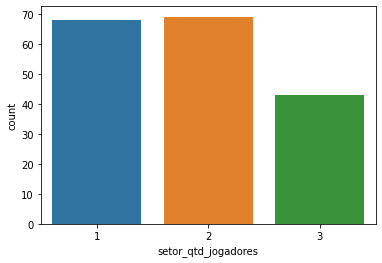

In [0]:
dados['setor_qtd_jogadores']=1
dados.loc[dados.Qtd_Jogadores>=40,"setor_qtd_jogadores"]=2
dados.loc[dados.Qtd_Jogadores>=50,"setor_qtd_jogadores"]=3
sns.countplot(x='setor_qtd_jogadores',data=dados)

Times distribuidos de modo equilibrado para que todos os setores tivessem um bom número de referências para fazermos análise do gráfico. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


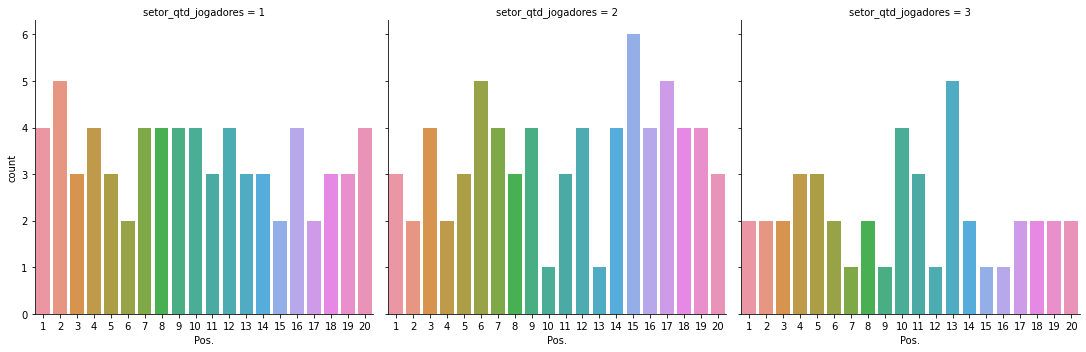

In [0]:
sns.factorplot(x='Pos.',col='setor_qtd_jogadores',kind='count',data=dados)

A quantidade de jogadores não revelou nenhuma tendencia.

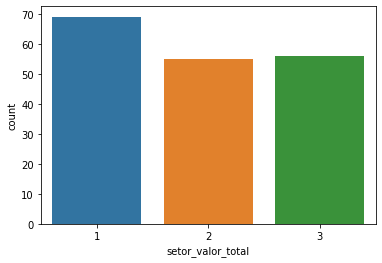

In [0]:
dados['setor_valor_total']=1
dados.loc[dados.Valor_total>=0.25e+08,"setor_valor_total"]=2
dados.loc[dados.Valor_total>=0.5e+08,"setor_valor_total"]=3
sns.countplot(x='setor_valor_total',data=dados)

Times distribuidos de modo equilibrado para que todos os setores tivessem um bom número de referências para fazermos análise do gráfico.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


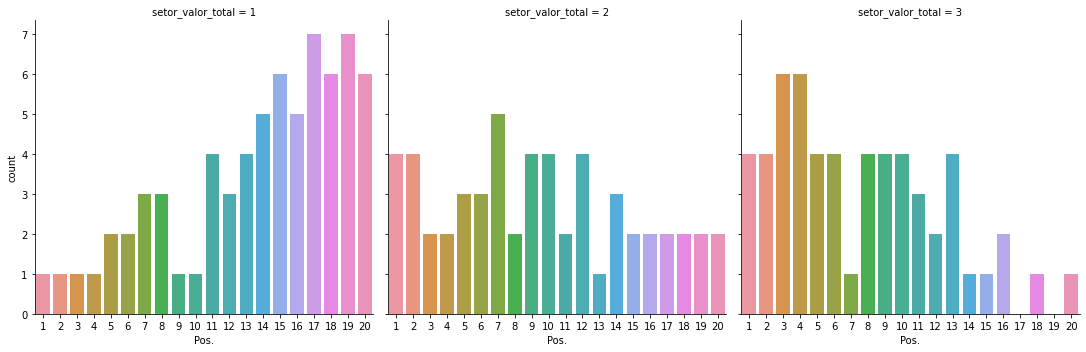

In [0]:
sns.factorplot(x='Pos.',col='setor_valor_total',kind='count',data=dados)

Aqui fica visível a diferença nas posições ocupadas no qual os times que investiram mais(**setor 3**) tiveram um melhor resultado

In [0]:
dados['pesos_valor_total']=0
dados.loc[dados.setor_valor_total==2,"pesos_valor_total"]=1
dados.loc[dados.setor_valor_total==3,"pesos_valor_total"]=2

Pesos de acordo com o setor.

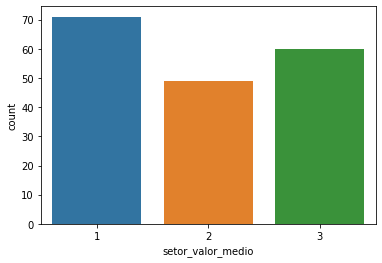

In [0]:
dados['setor_valor_medio']=1
dados.loc[dados.Media_Valor>=0.6e+06,"setor_valor_medio"]=2
dados.loc[dados.Media_Valor>=1.2e+06,"setor_valor_medio"]=3
sns.countplot(x='setor_valor_medio',data=dados)

Times distribuidos de modo equilibrado para que todos os setores tivessem um bom número de referências para fazermos análise do gráfico.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


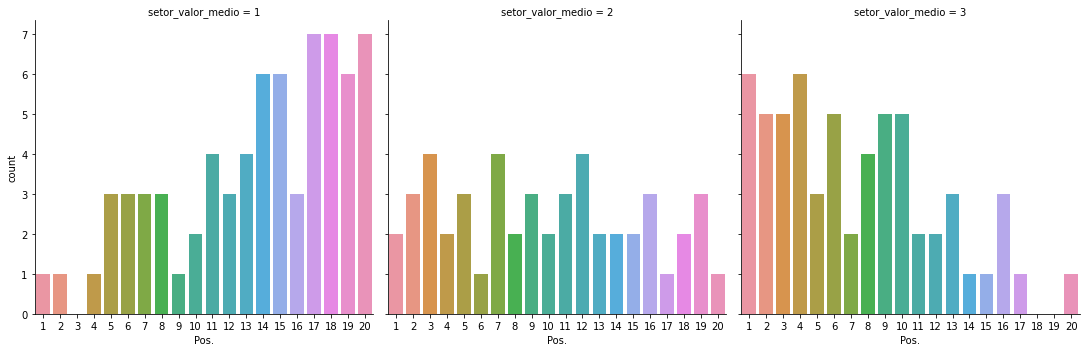

In [0]:
sns.factorplot(x='Pos.',col='setor_valor_medio',kind='count',data=dados)

Aqui fica visível a diferença nas posições ocupadas no qual os times que investiram mais por jogador(**setor 3**) tiveram um melhor desempenho.

In [0]:
dados['pesos_valor_medio']=0
dados.loc[dados.setor_valor_medio==2,"pesos_valor_medio"]=1
dados.loc[dados.setor_valor_medio==3,"pesos_valor_medio"]=2

Pesos de acordo com o setor.

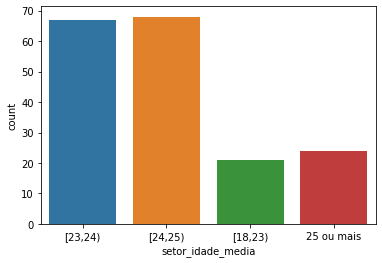

In [0]:
dados['setor_idade_media']='[18,23)'
dados.loc[dados.Idade_Media>=23,"setor_idade_media"]='[23,24)'
dados.loc[dados.Idade_Media>=24,"setor_idade_media"]='[24,25)'
dados.loc[dados.Idade_Media>=25,"setor_idade_media"]='25 ou mais'
sns.countplot(x='setor_idade_media',data=dados)

Fica evidente que a maioria dos times optam por possuir um time com média de idade de 23 até 25 anos

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


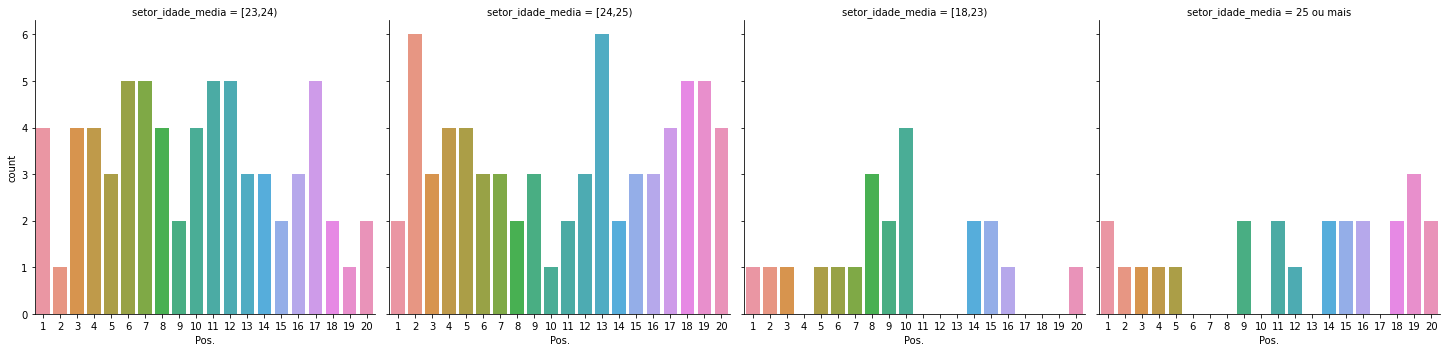

In [0]:
sns.factorplot(x='Pos.',col='setor_idade_media',kind='count',data=dados)

É possível ver que os jogadores de 23 a 24 anos possui uma média de rendimento melhor que os outros.

In [0]:
dados['pesos_idade_media']=1
dados.loc[dados.setor_idade_media=='[23,24)',"pesos_idade_media"]=2
dados.loc[dados.setor_idade_media=='[24,25)',"pesos_idade_media"]=1
dados.loc[dados.setor_idade_media=='25 ou mais',"pesos_idade_media"]=0

Dando os respectivos pesos.

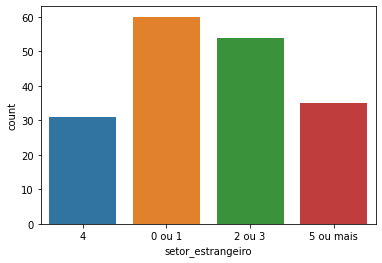

In [0]:
dados['setor_estrangeiro']='0 ou 1'
dados.loc[dados.Estrangeiros>=2,"setor_estrangeiro"]='2 ou 3'
dados.loc[dados.Estrangeiros>=4,"setor_estrangeiro"]=4
dados.loc[dados.Estrangeiros>=5,"setor_estrangeiro"]='5 ou mais'
sns.countplot(x='setor_estrangeiro',data=dados)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


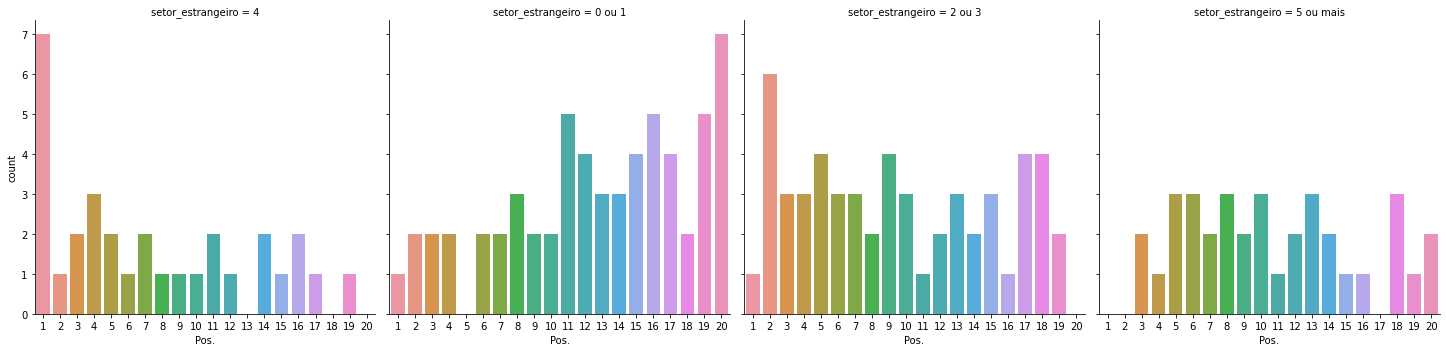

In [0]:
sns.factorplot(x='Pos.',col='setor_estrangeiro',kind='count',data=dados)

O melhores times possuem de 2 a 4 jogadores estrangeiros.

In [0]:
dados['pesos_estrangeiro']=0
dados.loc[dados.setor_estrangeiro=='2 ou 3',"pesos_estrangeiro"]=1
dados.loc[dados.setor_estrangeiro==4,"pesos_estrangeiro"]=2
dados.loc[dados.setor_estrangeiro=='5 ou mais',"pesos_estrangeiro"]=0

Pesos de acordo com o setor.

In [0]:
dados['pontuaçãogeral']=dados.pesos_idade_media+dados.pesos_estrangeiro+dados.pesos_valor_medio+dados.pesos_valor_total
teste=dados.sort_values(["pontuaçãogeral","pesos_valor_total",'pesos_valor_medio',"setor_idade_media"],ascending=[False,False,True,False]).loc[:,["Clubes","Pos.","pontuaçãogeral"]].reset_index(drop=True)
teste['diferença']= ((teste.index//9 )+ 1) - teste['Pos.']
teste.diferença.std()

5.756706072440148

Buscamos o menor desvio de resultados.

Usando os dados de **2018** para verificar validade das análises.

In [0]:
APrever['setor_valor_total']=1
APrever.loc[APrever.Valor_total>=0.25e+08,"setor_valor_total"]=2
APrever.loc[APrever.Valor_total>=0.5e+08,"setor_valor_total"]=3
APrever['pesos_valor_total']=0
APrever.loc[APrever.setor_valor_total==2,"pesos_valor_total"]=1
APrever.loc[APrever.setor_valor_total==3,"pesos_valor_total"]=2

In [0]:
APrever['setor_valor_medio']=1
APrever.loc[APrever.Media_Valor>=0.6e+06,"setor_valor_medio"]=2
APrever.loc[APrever.Media_Valor>=1.2e+06,"setor_valor_medio"]=3
APrever['pesos_valor_medio']=0
APrever.loc[APrever.setor_valor_medio==2,"pesos_valor_medio"]=1
APrever.loc[APrever.setor_valor_medio==3,"pesos_valor_medio"]=2

In [0]:
APrever['setor_idade_media']='[18,23)'
APrever.loc[APrever.Idade_Media>=23,"setor_idade_media"]='[23,24)'
APrever.loc[APrever.Idade_Media>=24,"setor_idade_media"]='[24,25)'
APrever.loc[APrever.Idade_Media>=25,"setor_idade_media"]='25 ou mais'
APrever['pesos_idade_media']=1
APrever.loc[APrever.setor_idade_media=='[23,24)',"pesos_idade_media"]=2
APrever.loc[APrever.setor_idade_media=='[24,25)',"pesos_idade_media"]=1
APrever.loc[APrever.setor_idade_media=='25 ou mais',"pesos_idade_media"]=0

In [0]:
APrever['setor_estrangeiro']=0
APrever.loc[APrever.Estrangeiros>=2,"setor_estrangeiro"]='2 ou 3'
APrever.loc[APrever.Estrangeiros>=4,"setor_estrangeiro"]=4
APrever.loc[APrever.Estrangeiros>=5,"setor_estrangeiro"]='5 ou mais'
APrever['pesos_estrangeiro']=0
APrever.loc[APrever.setor_estrangeiro=='2 ou 3',"pesos_estrangeiro"]=1
APrever.loc[APrever.setor_estrangeiro==4,"pesos_estrangeiro"]=2
APrever.loc[APrever.setor_estrangeiro=='5 ou mais',"pesos_estrangeiro"]=0

In [0]:
APrever.head(1)

,Ano,Pos.,Clubes,Vitorias,Empates,Derrotas,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,setor_valor_total,pesos_valor_total,setor_valor_medio,pesos_valor_medio,setor_idade_media,pesos_idade_media,setor_estrangeiro,pesos_estrangeiro
13,2018,1,Palmeiras,23,11,4,64:26,38,48,24.8,4,88330000,1840000,3,2,3,2,"[24,25)",1,4,2


In [0]:
APrever['pontuaçãogeral']=APrever.pesos_idade_media+APrever.pesos_estrangeiro+APrever.pesos_valor_medio+APrever.pesos_valor_total
previsao=APrever.sort_values(["pontuaçãogeral","pesos_valor_total",'pesos_valor_medio',"pesos_idade_media"],ascending=[False,False,True,False]).loc[:,["Clubes","Pos.","pontuaçãogeral"]].reset_index(drop=True)
previsao.index=previsao.index +1
previsao['correto']= previsao.index == previsao['Pos.']
previsao['diferença']=previsao.index-previsao['Pos.' ]
previsao

,Clubes,Pos.,pontuaçãogeral,correto,diferença
1,Palmeiras,1,7,True,0
2,Flamengo,2,6,True,0
3,Sao Paulo,5,6,False,-2
4,Atletico-MG,6,6,False,-2
5,Santos,10,6,False,-5
6,Gremio,4,5,False,2
7,Internacional,3,5,False,4
8,Cruzeiro,8,5,True,0
9,Botafogo,9,5,True,0
10,Bahia,11,5,False,-1


**Resultado previsto** dos dados para o ano de **2018** 

Xtest=dados.loc[:,['Vitorias','Derrotas','Empates']]
ytest=dados['Pos.']
model=LinearRegression(fit_intercept=True) 
model.fit(Xtest,ytest)

Xprev=APrever.loc[:,['Vitorias','Derrotas','Empates']]
#yReal=APrever['Pos.'].index
yPrev=model.predict(Xprev)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
score=cross_val_score(model,Xtest,ytest,cv=9)

sobreviventes=pd.DataFrame({'Clubes':APrever.Clubes,'ordem':yPrev})
sobreviventes.sort_values('ordem',inplace=True)


classificacao=pd.DataFrame({'Clubes':sobreviventes.Clubes})
classificacao.reset_index(drop=True,inplace=True)
classificacao.index=classificacao.index+1
classificacao['OrdemCorreta']=APrever.Clubes

classificacao